# GOOGLE DRIVE MOUNT

In [ ]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# UNZIP FOLDERS

In [ ]:
# unzipping images
# !unzip /content/drive/MyDrive/rtsd-d3-frames.zip -d /content/drive/MyDrive/

In [ ]:
# unzipping extra files
# !unzip /content/drive/MyDrive/rtsd-d3-gt.zip -d /content/drive/MyDrive/

In [ ]:
# number of train images
!ls /content/drive/MyDrive/rtsd-d3-frames/train | wc -l

# number of test images
!ls /content/drive/MyDrive/rtsd-d3-frames/test | wc -l

9065
3022


# PREPARING DATASET

In [ ]:
import pandas as pd

In [ ]:
# making list of patterns
patterns = ['blue_border', 'blue_rect', 'danger', 'main_road', 'mandatory', 'prohibitory']

# list of classes
sign_classes = []

# adding all classes to one list with no repetitions
# to count and to see which classes are there
for pattern in patterns:
  path = "/content/drive/MyDrive/rtsd-d3-gt/" + pattern + "/train_gt.csv"
  sign_classes.append(set(pd.read_csv(path)['sign_class']))

In [ ]:
test_sign_classes = []
for pattern in patterns:
  path = "/content/drive/MyDrive/rtsd-d3-gt/" + pattern + "/test_gt.csv"
  test_sign_classes.append(set(pd.read_csv(path)['sign_class']))

In [ ]:
# total number of classes
sum = 0
for folder in sign_classes:
  sum += len(folder)
print(sum)

105


In [ ]:
# making class to number file
# where i can take numbers by indexes
class_to_number = []
for pattern in sign_classes:
  for item in pattern:
    class_to_number.append(item)

# sorting it
class_to_number.sort()

In [ ]:
# read the txt file with only needed sign classes
signs = []
f = open("/content/drive/MyDrive/signs.txt", "r")
for line in f:
  signs.append(line[:-1])
f.close()

In [ ]:
# taking from train and test folders only those images which are needed (chosen classes)
import shutil
import pandas as pd
path_to_train_images = "/content/drive/MyDrive/rtsd-d3-frames/train/"
path_to_test_images = "/content/drive/MyDrive/rtsd-d3-frames/test/"
path_to_extra_info = "/content/drive/MyDrive/rtsd-d3-gt/"
path_to_dst_train = "/content/drive/MyDrive/rtsd-yolov4-tiny/train/"
path_to_dst_test = "/content/drive/MyDrive/rtsd-yolov4-tiny/test/"
patterns = ['blue_border', 'blue_rect', 'danger', 'main_road', 'mandatory', 'prohibitory']

for pattern in patterns:
  path_to_pattern = path_to_extra_info + pattern + "/"

  path_to_train_gt = path_to_pattern + "train_gt.csv"
  train_gt = pd.read_csv(path_to_train_gt)

  path_to_test_gt = path_to_pattern + "test_gt.csv"
  test_gt = pd.read_csv(path_to_test_gt)

  for i in range(len(train_gt)):
    if train_gt['sign_class'][i] in signs:
      path_to_src = path_to_train_images + train_gt['filename'][i]
      shutil.copy(path_to_src, path_to_dst_train)
  for i in range(len(test_gt)):
    if test_gt['sign_class'][i] in signs:
      path_to_src = path_to_test_images + test_gt['filename'][i]
      shutil.copy(path_to_src, path_to_dst_test)

In [ ]:
# adding all train and test csvs to one full train and one full test
path_to_extra_info = "/content/drive/MyDrive/rtsd-d3-gt/"
patterns = ['blue_border', 'blue_rect', 'danger', 'main_road', 'mandatory', 'prohibitory']

full_train_csv = pd.DataFrame()
full_test_csv = pd.DataFrame()

for pattern in patterns:
  path_to_pattern = path_to_extra_info + pattern + "/"

  path_to_train_gt = path_to_pattern + "train_gt.csv"
  train_gt = pd.read_csv(path_to_train_gt)
  full_train_csv = full_train_csv.append(train_gt, ignore_index=True)

  path_to_test_gt = path_to_pattern + "test_gt.csv"
  test_gt = pd.read_csv(path_to_test_gt)
  full_test_csv = full_test_csv.append(test_gt, ignore_index=True)

In [ ]:
# making csv files with only chosen classes
train_csv = pd.DataFrame()
test_csv = pd.DataFrame()
for i in range(len(full_train_csv)):
  if full_train_csv['sign_class'][i] in signs:
    train_csv = train_csv.append(full_train_csv.iloc[i], ignore_index=True)
for i in range(len(full_test_csv)):
  if full_test_csv['sign_class'][i] in signs:
    test_csv = test_csv.append(full_test_csv.iloc[i], ignore_index=True)

In [ ]:
# saving train and test csvs to the main folder
train_csv.to_csv('/content/drive/MyDrive/rtsd-yolov4-tiny/train.csv', index=False)
test_csv.to_csv('/content/drive/MyDrive/rtsd-yolov4-tiny/test.csv', index=False)

In [ ]:
train_csv.head()

,filename,height,sign_class,width,x_from,y_from
0,autosave01_02_2012_09_13_47.jpg,19.0,5_20,19.0,702.0,339.0
1,autosave01_02_2012_09_13_48.jpg,23.0,5_20,24.0,731.0,320.0
2,autosave01_02_2012_09_13_54.jpg,16.0,5_19_1,17.0,668.0,379.0
3,autosave01_02_2012_09_13_54.jpg,17.0,5_19_1,17.0,374.0,405.0
4,autosave01_02_2012_09_13_59.jpg,62.0,5_19_1,65.0,989.0,199.0


In [ ]:
import pandas as pd
train_csv = pd.read_csv("/content/drive/MyDrive/rtsd-yolov4-tiny/train.csv")
test_csv = pd.read_csv("/content/drive/MyDrive/rtsd-yolov4-tiny/test.csv")

In [ ]:
from PIL import Image

In [ ]:
# making txt files in yolov4 format
# to successfully train further
# and putting txt files properly into the train and test folders

for i in range(len(train_csv)):
  new_path_to_train_images = "/content/drive/MyDrive/rtsd-yolov4-tiny/train/"
  imagename = train_csv['filename'][i]
  new_path_to_train_image = new_path_to_train_images + imagename
  train_image = Image.open(new_path_to_train_image)
  image_width, image_height = train_image.size

  imagename = train_csv['filename'][i][:-4]
  class_number = str(signs.index(train_csv['sign_class'][i]))
  x_center = str((train_csv['x_from'][i] + train_csv['width'][i] / 2) / image_width)
  y_center = str((train_csv['y_from'][i] + train_csv['height'][i] / 2) / image_height)
  width = str(train_csv['width'][i] / image_width)
  height = str(train_csv['height'][i] / image_height)
  text = '{} {} {} {} {}'.format(class_number, x_center, y_center, width, height)
  text += "\n"

  filepath = "/content/drive/MyDrive/rtsd-yolov4-tiny/train/" + imagename + ".txt"
  f = open(filepath, mode="a")
  f.write(text)
  f.close()

  print(i)

for i in range(len(test_csv)):
  new_path_to_test_images = "/content/drive/MyDrive/rtsd-yolov4-tiny/test/"
  imagename = test_csv['filename'][i]
  new_path_to_test_image = new_path_to_test_images + imagename
  test_image = Image.open(new_path_to_test_image)
  image_width, image_height = test_image.size

  imagename = test_csv['filename'][i][:-4]
  class_number = str(signs.index(test_csv['sign_class'][i]))
  x_center = str((test_csv['x_from'][i] + test_csv['width'][i] / 2) / image_width)
  y_center = str((test_csv['y_from'][i] + test_csv['height'][i] / 2) / image_height)
  width = str(test_csv['width'][i] / image_width)
  height = str(test_csv['height'][i] / image_height)
  text = '{} {} {} {} {}'.format(class_number, x_center, y_center, width, height)
  text += "\n"

  filepath = "/content/drive/MyDrive/rtsd-yolov4-tiny/test/" + imagename + ".txt"
  f = open(filepath, mode="a")
  f.write(text)
  f.close()

  print(i)

# MANDATORY TEST

In [ ]:
import shutil

In [ ]:
# testing with mandatory folder
mandatory_names = pd.read_csv("/content/drive/MyDrive/rtsd-d3-gt/mandatory/train_gt.csv")['filename']

In [ ]:
# copying files from main train folder
# to newly created mandatory-test folder
source_path = "/content/drive/MyDrive/rtsd-d3-frames/train/"
destination_path = "/content/drive/MyDrive/mandatory-test/"
for name in mandatory_names:
  source_file = source_path + name
  destination_file = destination_path + name
  shutil.copy(source_file, destination_file)

In [ ]:
# getting info about mandatory folder files
mandatory_csv = pd.read_csv("/content/drive/MyDrive/rtsd-d3-gt/mandatory/train_gt.csv")

In [ ]:
# making txt files in yolov4 format
# to successfully train further
# and putting txt files into the same mandatory-test folder
image_width = 1280
image_height = 720
for i in range(len(mandatory_csv)):
  imagename = mandatory_csv['filename'][i][:-4]
  class_number = str(class_to_number.index(mandatory_csv['sign_class'][i]))
  x_center = str((mandatory_csv['x_from'][i] + mandatory_csv['width'][i]) / 2 / image_width)
  y_center = str((mandatory_csv['y_from'][i] + mandatory_csv['height'][i]) / 2 / image_height)
  width = str(mandatory_csv['width'][i] / image_width)
  height = str(mandatory_csv['height'][i] / image_height)
  text = '{} {} {} {} {}'.format(class_number, x_center, y_center, width, height)
  text += "\n"

  filepath = "/content/drive/MyDrive/mandatory-test/" + imagename + ".txt"
  f = open(filepath, mode="a")
  f.write(text)
  f.close()

# BOUNDING BOX TEST

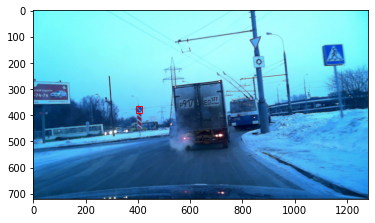

In [ ]:
# testing bounding boxes
import matplotlib.pyplot as plt
import matplotlib.patches as patches

im = Image.open("/content/drive/MyDrive/rtsd-d3-frames/train/autosave01_02_2012_09_17_09.jpg")

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((392, 366), 25, 25, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

# YOLOV4-TINY TRAINING

In [ ]:
# yolov4-tiny training
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15138, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 15138 (delta 29), reused 50 (delta 23), pack-reused 15073
Receiving objects: 100% (15138/15138), 13.47 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (10274/10274), done.


In [ ]:
!ln -s /content/drive/MyDrive/ /mydrive

In [ ]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [ ]:
!make

In [ ]:
%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

In [ ]:
!cp /mydrive/yolov4-tiny/obj.zip ../

!unzip ../obj.zip -d data/

In [ ]:
!cp /mydrive/yolov4-tiny/yolov4-tiny-custom.cfg ./cfg

In [ ]:
!cp /mydrive/yolov4-tiny/obj.names ./data
!cp /mydrive/yolov4-tiny/obj.data  ./data

In [ ]:
!cp /mydrive/yolov4-tiny/process.py ./

In [ ]:
!python process.py

In [ ]:
!ls data/

labels	obj  obj.data  obj.names  test.txt  train.txt


In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -dont_show -map

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
imShow("chart.png")

In [ ]:
# FOR TESTING:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny-custom.cfg
%cd ..

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_last.weights -points 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

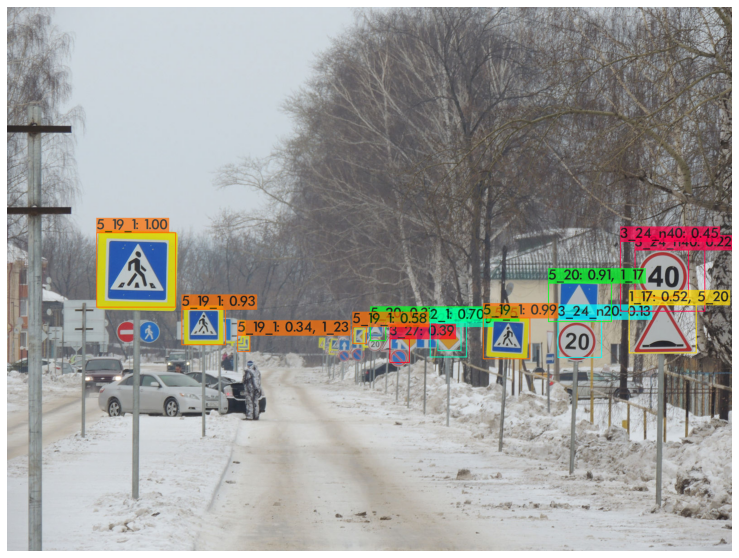

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /content/drive/MyDrive/yolov4-tiny/signs2.jpg -thresh 0.1

imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

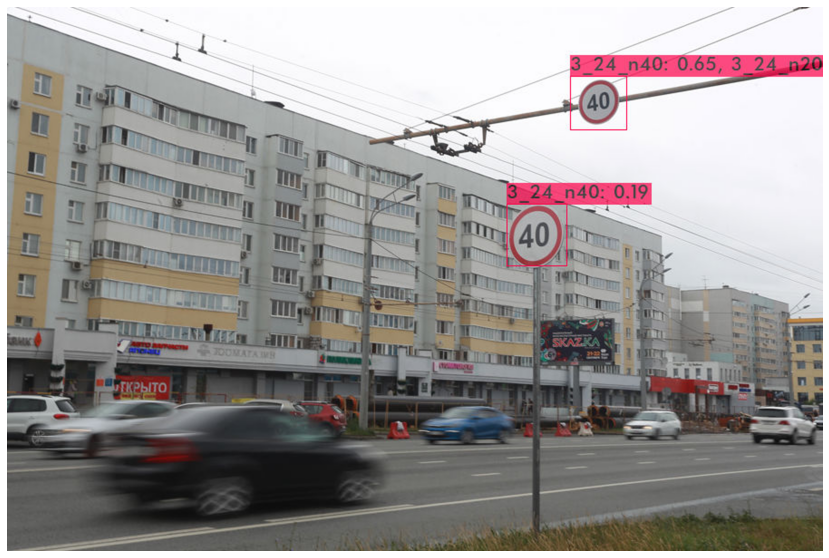

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny35/training/yolov4-tiny-custom_best.weights /content/drive/MyDrive/yolov4-tiny35/sign40.jpg -thresh 0.15

imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

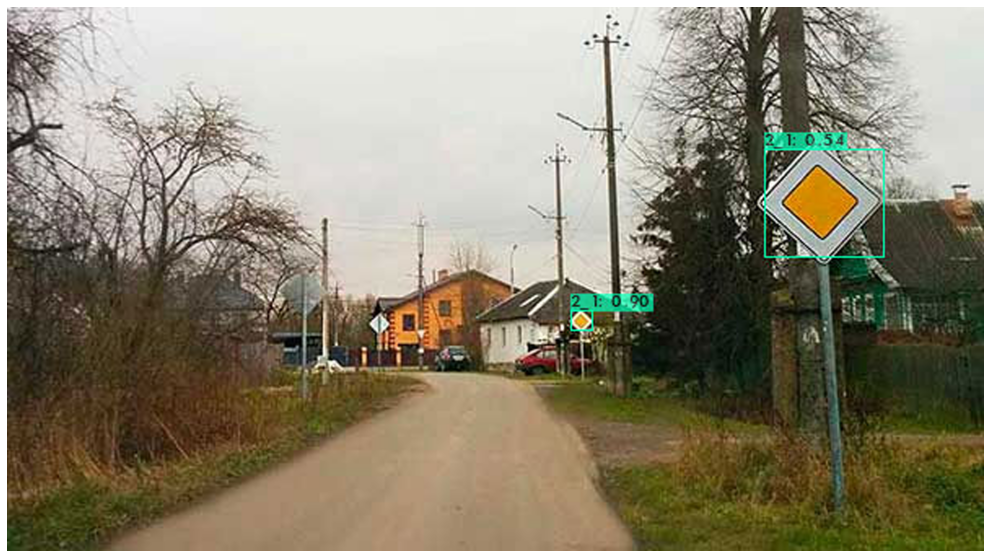

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny35/training/yolov4-tiny-custom_best.weights /content/drive/MyDrive/yolov4-tiny35/sign21.jpg -thresh 0.5

imShow('predictions.jpg')